# Dataset used: 
### https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv('covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## Data Representation
#### sex: Male-2,Female-1 ,
#### patient Type: Outpatient:1, Inpatient :2 
#### intubed: Yes:1, No:2, Missing: 97,98,99
#### pneumonia: Yes:1, No:2, Missing: 97,98,99
#### pregnancy: Yes:1, No:2 , Missing: 97,98,99
#### date died: Missing: 9999:99:99
#### covid_res : Results_awaiting: 3

In [3]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
df.drop(['id','entry_date', 'date_symptoms', 'date_died','icu'],axis='columns',inplace=True)
df.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res'],
      dtype='object')

In [6]:
df.nunique()

sex                      2
patient_type             2
intubed                  4
pneumonia                3
age                    120
pregnancy                4
diabetes                 3
copd                     3
asthma                   3
inmsupr                  3
hypertension             3
other_disease            3
cardiovascular           3
obesity                  3
renal_chronic            3
tobacco                  3
contact_other_covid      3
covid_res                3
dtype: int64

In [7]:
for item in df.columns:
    if item!='age':
        df[item].replace(to_replace=2,value=0,inplace=True)

In [8]:
df['covid_res'].unique()

array([1, 0, 3], dtype=int64)

In [9]:
df['covid_res'].replace({3:np.nan},inplace=True)
df['covid_res'].unique()

array([ 1.,  0., nan])

In [10]:
df.shape

(566602, 18)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(499692, 18)

In [13]:
df.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res'],
      dtype='object')

In [14]:
df.nunique()

sex                      2
patient_type             2
intubed                  4
pneumonia                3
age                    120
pregnancy                4
diabetes                 3
copd                     3
asthma                   3
inmsupr                  3
hypertension             3
other_disease            3
cardiovascular           3
obesity                  3
renal_chronic            3
tobacco                  3
contact_other_covid      3
covid_res                2
dtype: int64

In [15]:
cat=list(df.columns)
cat

['sex',
 'patient_type',
 'intubed',
 'pneumonia',
 'age',
 'pregnancy',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'contact_other_covid',
 'covid_res']

In [16]:
catg=['sex','patient_type','age','covid_res']
catg

['sex', 'patient_type', 'age', 'covid_res']

In [17]:
for item in catg:
    cat.remove(item)
cat

['intubed',
 'pneumonia',
 'pregnancy',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'contact_other_covid']

In [18]:
for item in cat:
    df[item].replace({97:np.nan,98:np.nan,99:np.nan},inplace=True)    

In [19]:
df['pregnancy'].unique()

array([nan,  0.,  1.])

In [20]:
df1=df.dropna()

In [21]:
df1.shape

(20352, 18)

# we cannot drop so many datas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [23]:
df['pregnancy'].isnull().sum()

254434

### so many data of pregnancy is missing

In [24]:
df['pregnancy'].value_counts() 

0.0    241644
1.0      3614
Name: pregnancy, dtype: int64

In [25]:
df[df['pregnancy']==1]['sex'].value_counts()

1    3614
Name: sex, dtype: int64

In [26]:
print('Male: ',df[df['sex']==0].shape[0])

Male:  253098


In [27]:
print('Female: ',df[df['sex']==1].shape[0])

Female:  246594


#### replacing Nan of 'pregnancy' with 0

In [28]:
df['pregnancy'].replace(np.nan,0,inplace=True)
df['pregnancy'].value_counts() 

0.0    496078
1.0      3614
Name: pregnancy, dtype: int64

## Working on Other datas

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [30]:
cat.append('sex')
cat

['intubed',
 'pneumonia',
 'pregnancy',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hypertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'contact_other_covid',
 'sex']

In [31]:
df1=df[cat].copy()
df1.columns

Index(['intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'sex'],
      dtype='object')

In [32]:
df1.dropna(inplace=True)
df1.shape

(51778, 15)

In [33]:
import seaborn as sns
corrm=df1.corr()
print(corrm)

                      intubed  pneumonia  pregnancy  diabetes      copd  \
intubed              1.000000   0.194081  -0.026157  0.043465  0.007706   
pneumonia            0.194081   1.000000  -0.075611  0.107441  0.022011   
pregnancy           -0.026157  -0.075611   1.000000 -0.050586 -0.018368   
diabetes             0.043465   0.107441  -0.050586  1.000000  0.064132   
copd                 0.007706   0.022011  -0.018368  0.064132  1.000000   
asthma              -0.016051  -0.023724   0.010378  0.001212  0.051728   
inmsupr              0.002094  -0.026346  -0.013699 -0.012915  0.030415   
hypertension         0.038270   0.095325  -0.053666  0.349956  0.099772   
other_disease        0.022146  -0.020056   0.013523 -0.012005  0.034418   
cardiovascular       0.018455   0.014809  -0.016549  0.086847  0.112005   
obesity              0.040568   0.081634  -0.018035  0.086989  0.022275   
renal_chronic        0.023464   0.022211  -0.018386  0.159087  0.047536   
tobacco              0.00

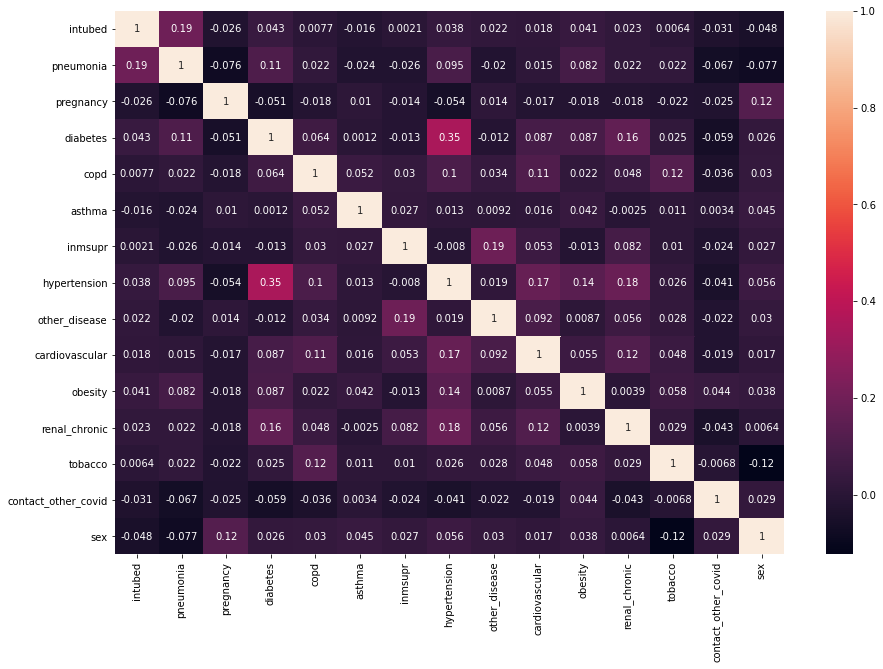

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(corrm,annot=True)

### Conclusion: hypertension and diabetes are very much correlated 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [36]:
df['intubed'].value_counts()

0.0    98321
1.0     9103
Name: intubed, dtype: int64

In [37]:
df['intubed'].fillna(method='ffill',inplace=True)

In [38]:
df['intubed'].fillna(method='bfill',inplace=True)

In [39]:
df['intubed'].value_counts()

0.0    458276
1.0     41416
Name: intubed, dtype: int64

### Data has become more satisfactory

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              499692 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [41]:
df['intubed'].unique()

array([0., 1.])

In [42]:
df['pneumonia'].value_counts()

0.0    420965
1.0     78716
Name: pneumonia, dtype: int64

In [43]:
df['pneumonia'].fillna(method='bfill',inplace=True)

In [44]:
df['pneumonia'].value_counts()

0.0    420975
1.0     78717
Name: pneumonia, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              499692 non-null  float64
 3   pneumonia            499692 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

### Similarly can be done till tobacco

In [46]:
classes=['diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco']

In [47]:
for item in classes:
    df[item].fillna(method='bfill',inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              499692 non-null  float64
 3   pneumonia            499692 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             499692 non-null  float64
 7   copd                 499692 non-null  float64
 8   asthma               499692 non-null  float64
 9   inmsupr              499692 non-null  float64
 10  hypertension         499692 non-null  float64
 11  other_disease        499692 non-null  float64
 12  cardiovascular       499692 non-null  float64
 13  obesity              499692 non-null  float64
 14  renal_chronic        499692 non-null  float64
 15  tobacco          

In [49]:
df['contact_other_covid'].value_counts()

1.0    196966
0.0    149051
Name: contact_other_covid, dtype: int64

In [50]:
df['contact_other_covid'].fillna(method='ffill',inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              499692 non-null  float64
 3   pneumonia            499692 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             499692 non-null  float64
 7   copd                 499692 non-null  float64
 8   asthma               499692 non-null  float64
 9   inmsupr              499692 non-null  float64
 10  hypertension         499692 non-null  float64
 11  other_disease        499692 non-null  float64
 12  cardiovascular       499692 non-null  float64
 13  obesity              499692 non-null  float64
 14  renal_chronic        499692 non-null  float64
 15  tobacco          

## we have succesfully done preprocessing of data

In [52]:
age_onehot=pd.get_dummies(df['age'])
age_onehot

,0,1,2,3,4,5,6,7,8,9,...,110,111,113,114,115,116,117,118,119,120
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.drop('age',axis='columns',inplace=True)
df.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res'],
      dtype='object')

In [54]:
df=pd.concat([df,age_onehot],axis=1)
df.columns

Index([         'sex', 'patient_type',      'intubed',    'pneumonia',
          'pregnancy',     'diabetes',         'copd',       'asthma',
            'inmsupr', 'hypertension',
       ...
                  110,            111,            113,            114,
                  115,            116,            117,            118,
                  119,            120],
      dtype='object', length=137)

In [55]:
df.isnull().any()

sex             False
patient_type    False
intubed         False
pneumonia       False
pregnancy       False
                ...  
116             False
117             False
118             False
119             False
120             False
Length: 137, dtype: bool

## Pre-processing Completed

In [56]:
df.shape

(499692, 137)

In [57]:
X=df.drop(['covid_res'], axis='columns')
Y=df['covid_res']

In [58]:
X.shape,Y.shape

((499692, 136), (499692,))

In [59]:
Y[:5]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: covid_res, dtype: float64

In [60]:
Y.value_counts()

0.0    279035
1.0    220657
Name: covid_res, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=(0.1),random_state=1)

In [62]:
X.columns.shape

(136,)

## Model Selection DNN

In [63]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(136,),activation='relu'),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dropout(0.25), 
    keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(16,activation='relu'),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(16,activation='relu'),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(1,activation='sigmoid')
])

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback

In [66]:
early_stopping=EarlyStopping(monitor='val_accuracy',patience=2,verbose=0,mode='max',restore_best_weights=False)
callbacks=[PlotLossesCallback(),early_stopping]

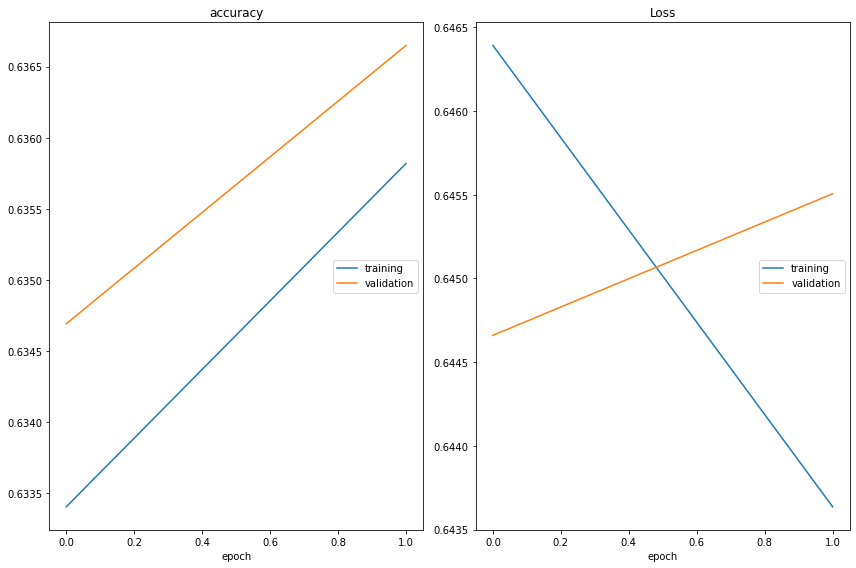

accuracy
	training         	 (min:    0.633, max:    0.636, cur:    0.636)
	validation       	 (min:    0.635, max:    0.637, cur:    0.637)
Loss
	training         	 (min:    0.644, max:    0.646, cur:    0.644)
	validation       	 (min:    0.645, max:    0.646, cur:    0.646)
12649/12649 [==============================] - 31s 2ms/step - loss: 0.6436 - accuracy: 0.6358 - val_loss: 0.6455 - val_accuracy: 0.6366


In [67]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=2,verbose=1,callbacks=callbacks)

In [68]:
model.evaluate(X_test,Y_test)

1562/1562 [==============================] - 2s 1ms/step - loss: 0.6422 - accuracy: 0.6397


[0.6421638131141663, 0.6397438645362854]

In [69]:
Yp_s=model.predict(X_train)

In [70]:
Yp_s[:5]

array([[0.7752825 ],
       [0.36789897],
       [0.41400522],
       [0.35055554],
       [0.5360783 ]], dtype=float32)

In [71]:
yp_s=[]
for i in Yp_s:
    if(i>=0.5):
        yp_s.append(1)
    else:
        yp_s.append(0)

In [72]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_train,yp_s))

              precision    recall  f1-score   support

         0.0       0.63      0.85      0.72    251122
         1.0       0.66      0.37      0.47    198600

    accuracy                           0.64    449722
   macro avg       0.64      0.61      0.60    449722
weighted avg       0.64      0.64      0.61    449722

